In [2]:
import numpy as np
from numpy import fft as fft
from matplotlib import pyplot as plt
import astropy.io.fits as pyfits

In [3]:
#name = 'hlsp_frontier_model_abell2744_cats_v4.1_kappa'
name = 'abell2744_mass_density'
input_map, header = pyfits.getdata(f"data/{name}.fits", header=True)

deg2arcsec = 60.0*60.0

shape = input_map.shape
pixel_size = np.abs(header['CDELT2'])
side_length_pixels = input_map.shape[0]
side_length_deg = pixel_size*side_length_pixels
side_length_arcsec = side_length_deg * deg2arcsec

print(side_length_arcsec)

1001.0010010010003


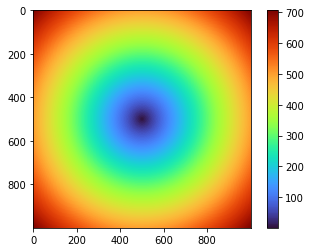

In [4]:
y, x = np.indices(shape)
center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
r = np.hypot(x - center[0], y - center[1])

plt.imshow(r, cmap='turbo')
plt.colorbar()
plt.show()

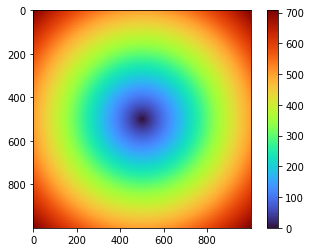

In [5]:
# compute the wave vectors
# returns from 0 to 0.5 (Nyquist rate)
kfreq = fft.fftfreq(shape[0])*shape[0]
kfreq = fft.fftshift(kfreq)
kfreq2D = np.meshgrid(kfreq, kfreq)

# take the norm of the wave vectors
kfreq_norm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
#kfreq_norm = kfreq_norm.flatten()


plt.imshow(kfreq_norm, cmap='turbo')
plt.colorbar()
plt.show()

In [17]:
# Giulia's angular grid in arcsec
tet_1grid_old = np.append((0.1+10**(.065*np.arange(50))), 1533.0)
tet_1grid_new=np.zeros(24,dtype=float)
tet_1grid_new[0]=3.41131121e+00
tet_1grid_new[1]=7.09841996e+00
tet_1grid_new[2]=1.10647820e+01
tet_1grid_new[3]=1.48910839e+01
tet_1grid_new[4]=1.72790839e+01
tet_1grid_new[5:22]=tet_1grid_old[20:37]
tet_1grid_new[22]=3.98207171e+02
tet_1grid_new[23]=1.53300000e+03
tet_1grid=np.zeros(24,dtype=float)
tet_1grid=tet_1grid_new

print("Grid Arcsec")
print(tet_1grid)
ratios = tet_1grid[1:]/tet_1grid[:-1]
print("ratios", ratios)




kbins = 1.0/tet_1grid
kbins = np.flip(kbins)
print("kbins", kbins*1001)
ratios = kbins[1:]/kbins[:-1]
print("kbin ratios", ratios)
kbin_vals = 0.5*(kbins[1:]+kbins[:-1])

scale = 1001.001 # width in arcsecs
grid_vals = 1.0/kbin_vals# * scale
grid_vals = np.flip(grid_vals)

print("grid_vals", grid_vals)
ratios = grid_vals[1:]/grid_vals[:-1]
print("grid_vals ratio", ratios)


Grid Arcsec
[   3.41131121    7.09841996   11.064782     14.8910839    17.2790839
   20.05262315   23.2739465    27.01534804   31.36079367   36.40780548
   42.26965034   49.07788194   56.98529308   66.1693448    76.83614894
   89.22509381  103.61421667  120.32644346  139.73683611  162.28100974
  188.46490895  218.87616239  398.207171   1533.        ]
ratios [2.08084796 1.55876689 1.34580906 1.16036442 1.16051425 1.16064349
 1.16075493 1.160851   1.1609338  1.16100517 1.16106666 1.16111965
 1.1611653  1.16120462 1.16123849 1.16126767 1.1612928  1.16131444
 1.16133308 1.16134913 1.16136295 1.81932636 3.84975488]
kbins [  0.65296804   2.51376689   4.57336235   5.31133358   6.16831262
   7.16346547   8.31903588   9.66083644  11.21881701  13.02772216
  15.12785117  17.5659358   20.39615323  23.6812936   27.49410427
  31.91883504  37.05301144  43.00946554  49.91865615  57.93131197
  67.22143309  90.4672139  141.0172976  293.43555553]
kbin ratios [3.84975488 1.81932636 1.16136295 1.16134913 1

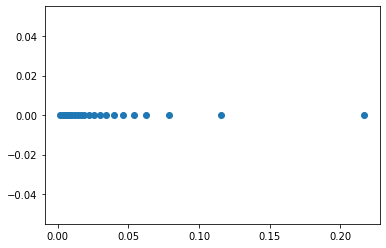

In [7]:
nr = np.histogram(r,kbins)[0]
bin_centers = 0.5*(kbins[1:]+kbins[:-1])

plt.plot(bin_centers, nr, 'o')
plt.show()

In [8]:
def theta_half(theta_b, theta_a):
    return 2.0 * (theta_b*theta_a)/(theta_a+theta_b)
def theta_a(theta_b, theta_h):
    return theta_b*theta_h / (2*theta_b - theta_h)

print(theta_half(398.207171, 1533.))

print(theta_a(1533, 632))
print(theta_a(398, 282))

632.1968997525021
398.05094494659
218.3579766536965


0.01
b=0.28007170782823854
[  1.           1.90577536   3.63197973   6.92173747  13.19127673
  25.13961018  47.91044967  91.30655451 174.00978188 331.62355487
 632.        ]
11
[0.00000000e+00 3.16455696e+00 9.19549165e+00 2.06890984e+01
 4.25933309e+01 8.43378775e+01 1.63893606e+02 3.15508953e+02
 6.04453746e+02 1.15511761e+03 2.20455924e+03 4.20455924e+03]


array([0.00000000e+00, 3.16455696e-03, 9.19549165e-03, 2.06890984e-02,
       4.25933309e-02, 8.43378775e-02, 1.63893606e-01, 3.15508953e-01,
       6.04453746e-01, 1.15511761e+00, 2.20455924e+00, 4.20455924e+00])

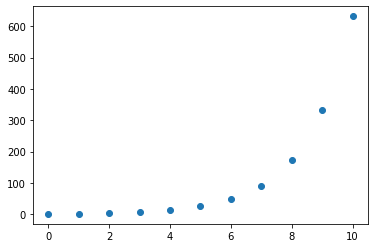

In [9]:
Rt = np.hypot(side_length_arcsec/2.0, side_length_arcsec/2.0)


def get_nk_in_last_bins(thetaa_b):
    ra = 0.0
    rb = 2.0/thetaa_b
    print(rb)
    rb *= side_length_arcsec
    rk = kfreq_norm #.flatten()
    items = rk[(ra <= rk) & (rk < rb)]
    
def build_thetaa(R, n):
    b = np.log10(R)/n
    print(f"{b=}")
    thetaa = 10**(b*np.arange(n+1))
    print(thetaa)
    return thetaa

def build_kbins_from_theta_vals(theta):
    n = theta.size
    k = np.zeros(n+1)
    theta = np.flip(theta)
    k[0] = 0
    print(n)
    for i in range(0, n):
        k[i+1] = 2.0/theta[i] + k[i]
#        print(f"{i=}, {n-i=}: {k[i]=}, {2.0/theta[n-i]=}, {k[i-1]=}, {theta[n-i]=}")
        
    print(k*1000)
    return k
    
#    print(rk)
#    print(items)
get_nk_in_last_bins(200)

theta = build_thetaa(632, 10)
plt.plot(theta, 'o')
build_kbins_from_theta_vals(theta)


In [11]:
kfreq = fft.fftfreq(x)*x
kfreq = fft.fftshift(kfreq)
kfreq2D = np.meshgrid(kfreq, kfreq)

# take the norm of the wave vectors
kfreq_norm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

nr = np.histogram(kfreq_norm.flatten(),kbins)[0]
rbin_center = 0.5*(kbins[1:]+kbins[:-1])

plt.plot(rbin_center, nr, 'o')
plt.ylim(0, np.max(nr)*1.2)
plt.show()

ValueError: `bins` must increase monotonically, when an array